In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
!pip install ucimlrepo


In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
individual_household_electric_power_consumption = fetch_ucirepo(id=235)

# data (as pandas dataframes)
X = individual_household_electric_power_consumption.data.features
y = individual_household_electric_power_consumption.data.targets

# metadata
print(individual_household_electric_power_consumption.metadata)

# variable information
print(individual_household_electric_power_consumption.variables)

/usr/local/lib/python3.11/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


{'uci_id': 235, 'name': 'Individual Household Electric Power Consumption', 'repository_url': 'https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption', 'data_url': 'https://archive.ics.uci.edu/static/public/235/data.csv', 'abstract': 'Measurements of electric power consumption in one household with a one-minute sampling rate over a period of almost 4 years. Different electrical quantities and some sub-metering values are available.', 'area': 'Physics and Chemistry', 'tasks': ['Regression', 'Clustering'], 'characteristics': ['Multivariate', 'Time-Series'], 'num_instances': 2075259, 'num_features': 9, 'feature_types': ['Real'], 'demographics': [], 'target_col': None, 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2006, 'last_updated': 'Fri Mar 08 2024', 'dataset_doi': '10.24432/C58K54', 'creators': ['Georges Hebrail', 'Alice Berard'], 'intro_paper': None, 'additional_info': {'summary': 'This archiv

In [6]:
import pandas as pd
df =pd.read_csv('https://archive.ics.uci.edu/static/public/235/data.csv')

display(df)

<ipython-input-6-c4babfe75c52>:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('https://archive.ics.uci.edu/static/public/235/data.csv')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [7]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

<ipython-input-7-93e83f2bc647>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [8]:

df['Global_active_power'] = pd.to_numeric( df['Global_active_power'].replace('?',np.nan))
df['Global_reactive_power'] = pd.to_numeric( df['Global_reactive_power'].replace('?',np.nan))
df['Voltage'] = pd.to_numeric( df['Voltage'].replace('?',np.nan))
df['Global_intensity'] = pd.to_numeric( df['Global_intensity'].replace('?',np.nan))
df['Sub_metering_1'] = pd.to_numeric( df['Sub_metering_1'].replace('?',np.nan))
df['Sub_metering_2'] = pd.to_numeric( df['Sub_metering_2'].replace('?',np.nan))
df['Sub_metering_3'] = pd.to_numeric( df['Sub_metering_3'].replace('?',np.nan))


In [9]:
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['day_of_week'] = df['datetime'].dt.dayofweek  # Monday=0, Sunday=6
df['hour'] = df['datetime'].dt.hour

<ipython-input-9-e89f2122b8e7>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])


In [9]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979
datetime,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 15 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   datetime               datetime64[ns]
 10  year                   int32         
 11  month                  int32         
 12  day                    int32         
 13  day_of_week            int32         
 14  hour                   int32         
dtypes: datetime64[ns](1), float64(7), int32(5), object(2)
memory usage: 197.9+ MB


In [10]:
df['Global_active_power']= df['Global_active_power'].fillna(df['Global_active_power'].median())
df['Global_reactive_power']= df['Global_reactive_power'].fillna(df['Global_reactive_power'].median())
df['Voltage']= df['Voltage'].fillna(df['Voltage'].mean())
df['Global_intensity']= df['Global_intensity'].fillna(df['Global_intensity'].median())
df['Sub_metering_1']= df['Sub_metering_1'].fillna(df['Sub_metering_1'].median())
df['Sub_metering_2']= df['Sub_metering_2'].fillna(df['Sub_metering_2'].median())
df['Sub_metering_3']= df['Sub_metering_3'].fillna(df['Sub_metering_3'].median())


In [12]:
df.isnull().sum()

,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
datetime,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,year,month,day,day_of_week,hour
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2075259,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.085486e+00,1.234176e-01,2.408399e+02,4.602375e+00,1.107879e+00,1.282265e+00,6.390116e+00,2008-12-06 07:12:59.999994112,2.008437e+03,6.450359e+00,1.577363e+01,2.998909e+00,1.150076e+01
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,2006-12-16 17:24:00,2.006000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2007-12-12 00:18:30,2.007000e+03,3.000000e+00,8.000000e+00,1.000000e+00,6.000000e+00
50%,6.020000e-01,1.000000e-01,2.409600e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2008-12-06 07:13:00,2.008000e+03,6.000000e+00,1.600000e+01,3.000000e+00,1.200000e+01
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,2009-12-01 14:07:30,2.009000e+03,9.000000e+00,2.300000e+01,5.000000e+00,1.800000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,2010-11-26 21:02:00,2.010000e+03,1.200000e+01,3.100000e+01,6.000000e+00,2.300000e+01
std,1.052065e+00,1.120452e-01,3.219643e+00,4.422241e+00,6.115669e+00,5.787271e+00,8.406114e+00,NaN,1.128677e+00,3.415762e+00,8.787773e+00,2.000064e+00,6.922227e+00


(array([2.01278e+06, 5.33200e+03, 4.30800e+03, 5.83400e+03, 4.46970e+04,
        1.36500e+03, 2.95000e+02, 1.37000e+02, 4.69000e+02, 4.20000e+01]),
 array([ 0. ,  8.8, 17.6, 26.4, 35.2, 44. , 52.8, 61.6, 70.4, 79.2, 88. ]),
 <BarContainer object of 10 artists>)

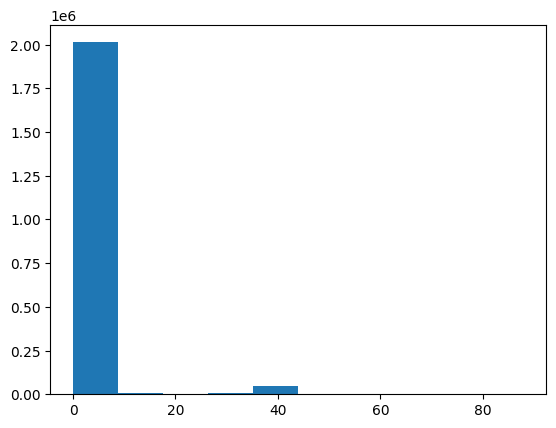

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['Sub_metering_1'])


In [13]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

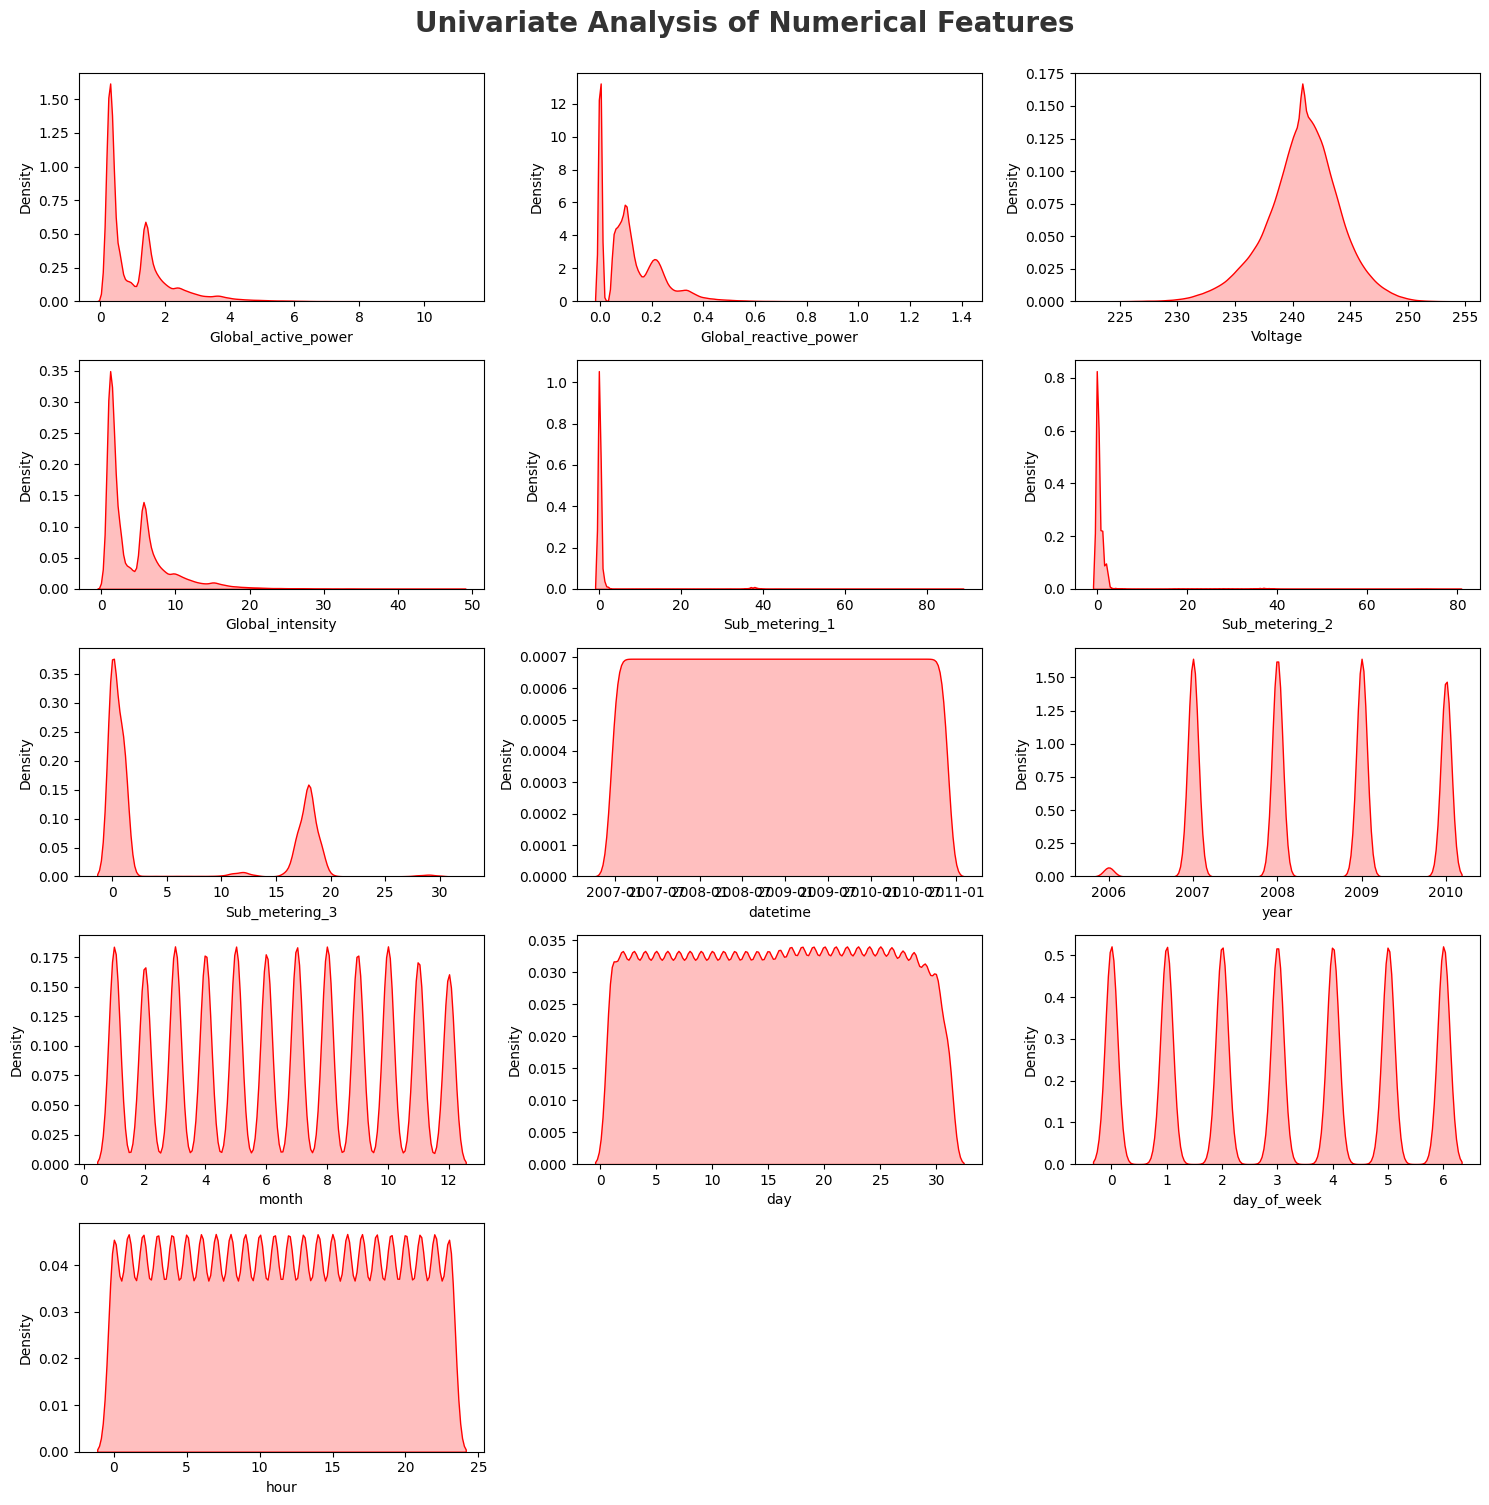

In [ ]:
## Proportion of count data on numerical columns
import seaborn as sns
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],fill=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

1.Global_active_power

Skewed right.

Most values are concentrated between 0 and 2 kW.

Some outliers go beyond 5 kW.

2.Global_reactive_power

Also skewed right.

Mostly values under 0.2 kW.

3.Voltage

Bell-shaped (normal distribution).

Centered around 240 V.

4.Global_intensity

Similar to active power, skewed.

Higher density under 5 A.

5.Sub_metering_1

Very sharp peak near 0.

Few higher values, possibly outliers.

6.Sub_metering_2

Similar to sub_metering_1.

Strong peak near 0, with rare higher values.

7.Sub_metering_3

Bimodal distribution.

One peak near 0, another near 15.

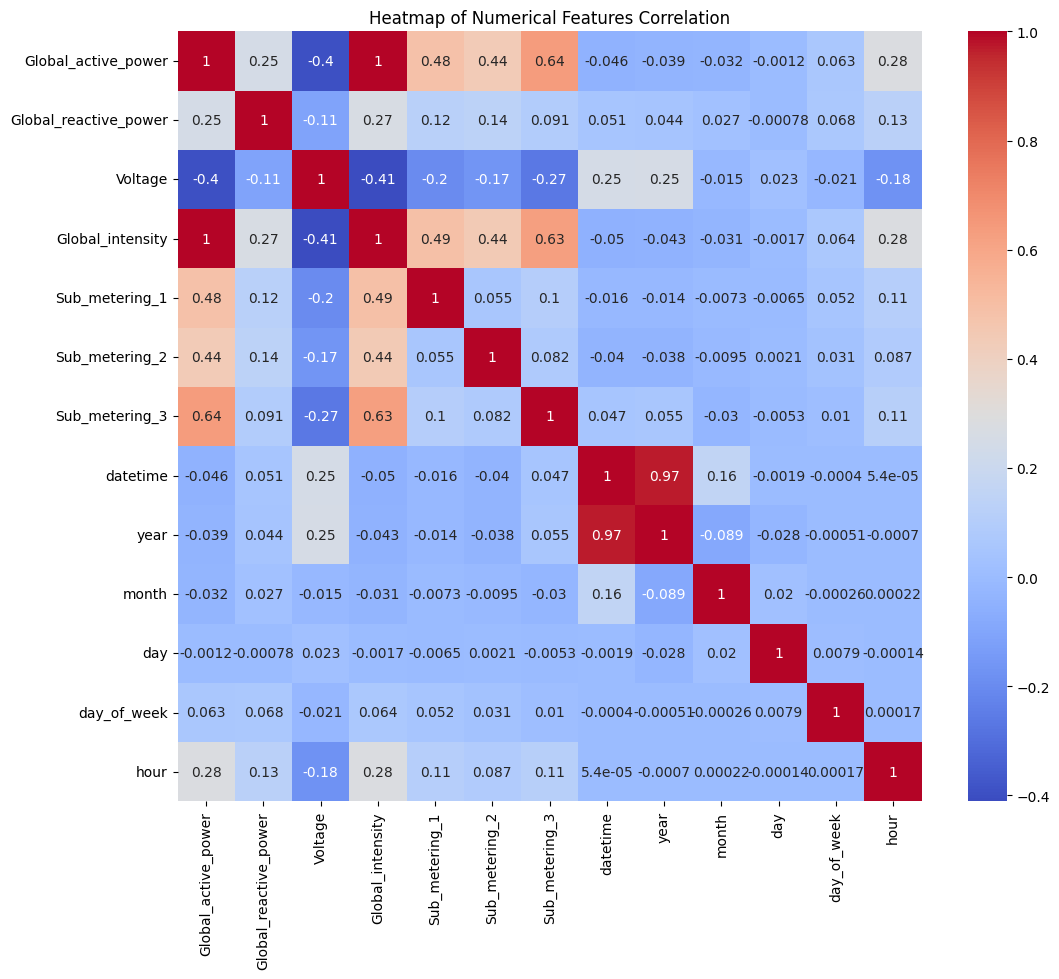

In [ ]:

plt.figure(figsize=(12, 10))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Numerical Features Correlation')
plt.show()


Strong Correlations:

Global_active_power and Global_intensity show perfect correlation (1.0)

Sub_metering_3 has strong negative correlation with Global_active_power (-0.64)

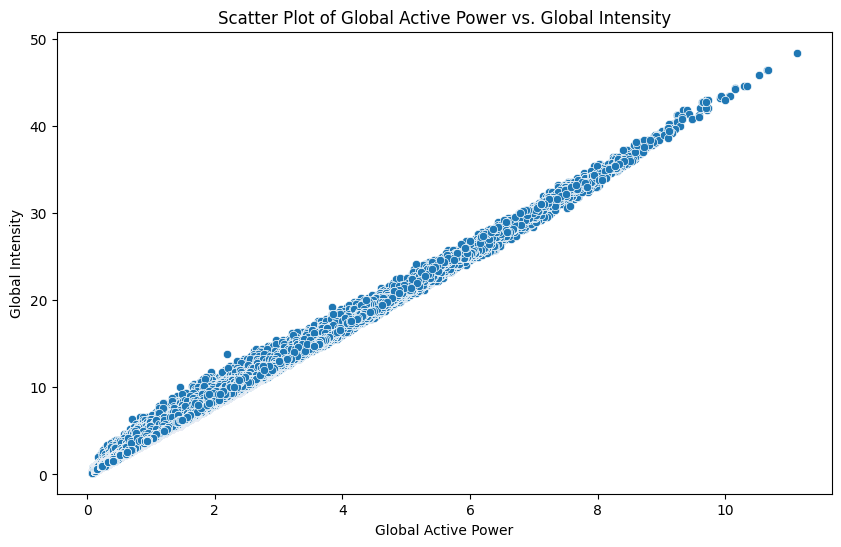

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Global_active_power', y='Global_intensity', data=df)
plt.title('Scatter Plot of Global Active Power vs. Global Intensity')
plt.xlabel('Global Active Power')
plt.ylabel('Global Intensity')
plt.show()


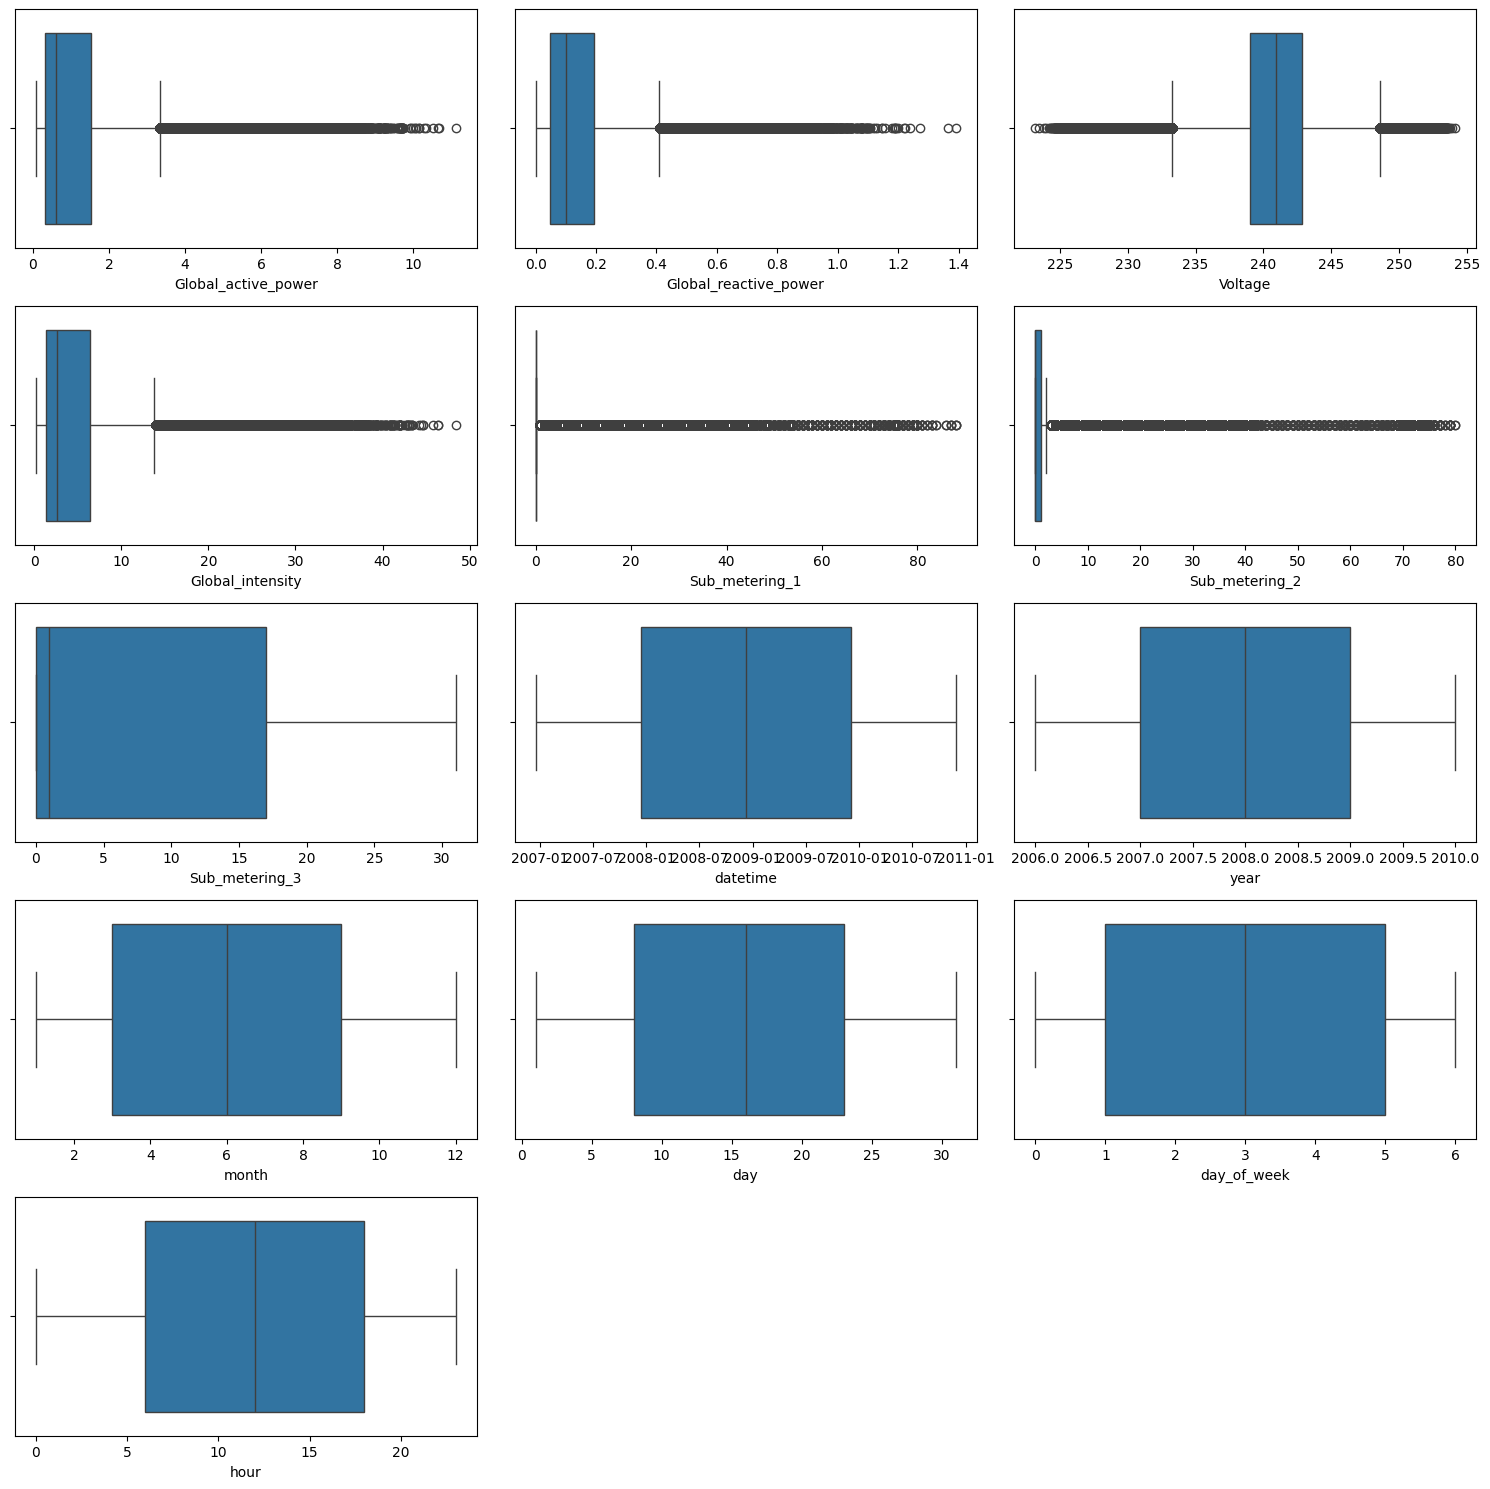

In [14]:
# prompt: write a code to display box plot for all the numer_features

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
for i in range(0, len(numeric_features)):
  plt.subplot(5, 3, i+1)
  sns.boxplot(x=df[numeric_features[i]])
  plt.xlabel(numeric_features[i])
  plt.tight_layout()
plt.show()


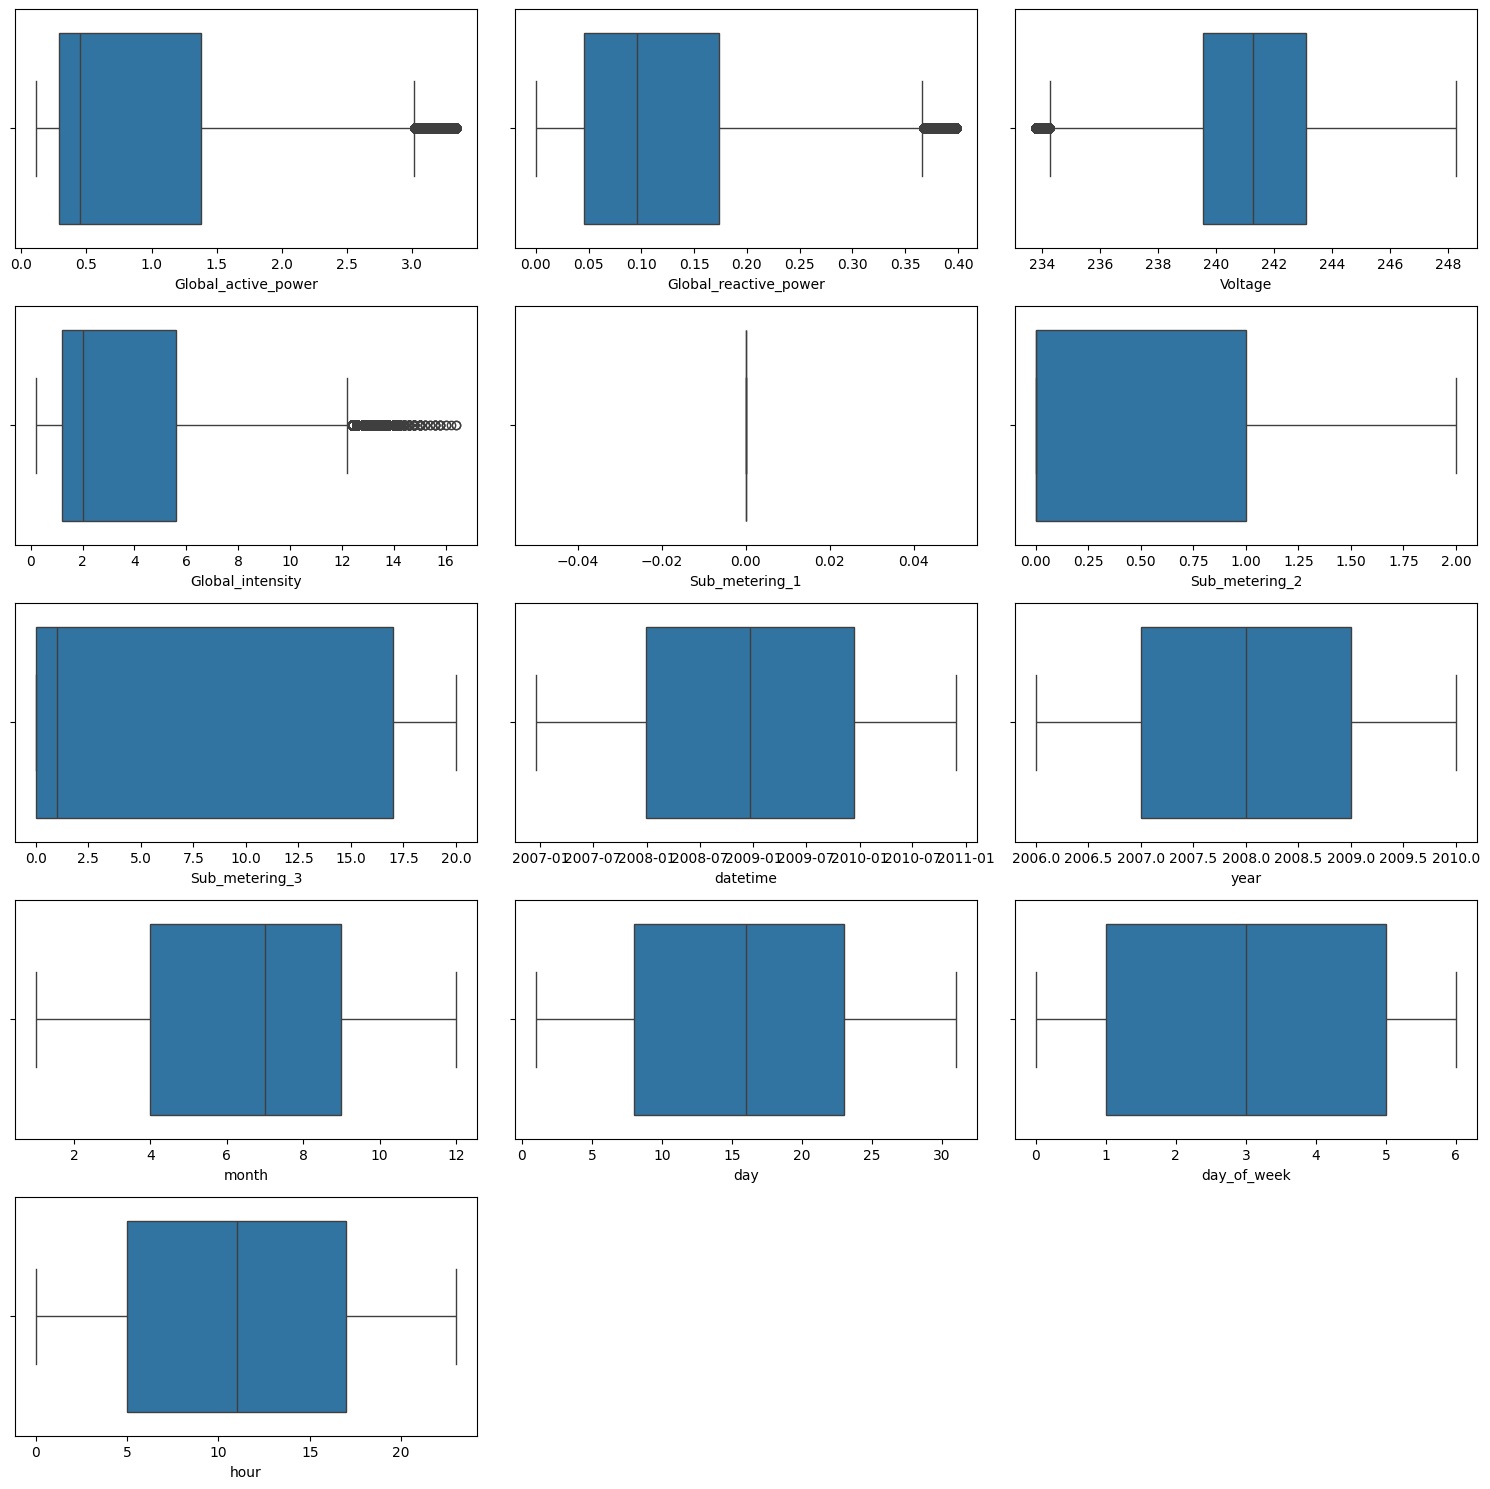

In [ ]:
#outliers for all features

def remove_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

# Apply IQR method to remove outliers for all specified columns
columns_to_trim = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for column in columns_to_trim:
  df = remove_outliers_iqr(df, column)

# Now you can visualize the data again with box plots to see the effect of outlier removal.
plt.figure(figsize=(15, 15))
for i in range(0, len(numeric_features)):
  plt.subplot(5, 3, i+1)
  sns.boxplot(x=df[numeric_features[i]])
  plt.xlabel(numeric_features[i])
  plt.tight_layout()
plt.show()


In [ ]:
display(df)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,year,month,day,day_of_week,hour
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00,2006,12,16,5,17
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00,2006,12,16,5,17
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00,2006,12,16,5,17
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00,2006,12,16,5,17
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00,2006,12,16,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,2010,11,26,4,20
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,2010,11,26,4,20
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,2010,11,26,4,21
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,2010,11,26,4,21


In [11]:
#feature and target splitting
x=df[['Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_3']]
y=df['Global_active_power']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
#scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train) #to find the min max of x_train
print(scaler.data_max_)
print(scaler.data_min_)
print(scaler.data_range_)
x_test = scaler.transform(x_test)

[  1.364 254.15   48.4    88.     31.   ]
[0.000e+00 2.232e+02 2.000e-01 0.000e+00 0.000e+00]
[ 1.364 30.95  48.2   88.    31.   ]


In [15]:
#model implementation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor




# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=50, n_jobs=-1, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, random_state=42),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
   }

# Dictionary to store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(x_train, y_train)  # Train the model
    y_pred = model.predict(x_test)  # Predict on test data

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)   # Average absolute difference between actual & predicted values.
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # Penalizes large errors more than MAE
    r2 = r2_score(y_test, y_pred)   # Measures how well the model explains variance in the target variable.

    # Store results
    results.append({"Model": name, "MAE": mae, "RMSE": rmse, "R²": r2})

# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="RMSE", ascending=True)

# Display results
print(results_df)

               Model       MAE      RMSE        R²
1      Random Forest  0.019384  0.034266  0.998940
0  Linear Regression  0.025722  0.040575  0.998514
2  Gradient Boosting  0.026545  0.041362  0.998456
3                KNN  0.023420  0.042019  0.998407
4      Decision Tree  0.023235  0.043713  0.998276


In [16]:
import plotly.express as px

# RMSE Comparison
fig_rmse = px.bar(results_df, x='RMSE', y='Model', orientation='h',
                   color='RMSE', color_continuous_scale='viridis',
                   title='Model RMSE Comparison')

fig_rmse.update_layout(xaxis_title='RMSE', yaxis_title='Model')
fig_rmse.show()

# R² Comparison
fig_r2 = px.bar(results_df, x='R²', y='Model', orientation='h',
                 color='R²', color_continuous_scale='bluered',
                 title='Model R² Score Comparison')

fig_r2.update_layout(xaxis_title='R² Score', yaxis_title='Model')
fig_r2.show()

Best Model Selection Criteria

Random Forest has:

✅ The lowest RMSE (0.034266) → indicating better predictive accuracy.

✅ The lowest MAE (0.019384) → meaning lower absolute errors.

✅ A very high R² (0.998940) → indicating higher accuracy

when compare to other models

Final Recommendation:

🚀 Random Forest is the best choice ✅ because it balances high accuracy with better error metrics, making it the most reliable model for real-world predictions.

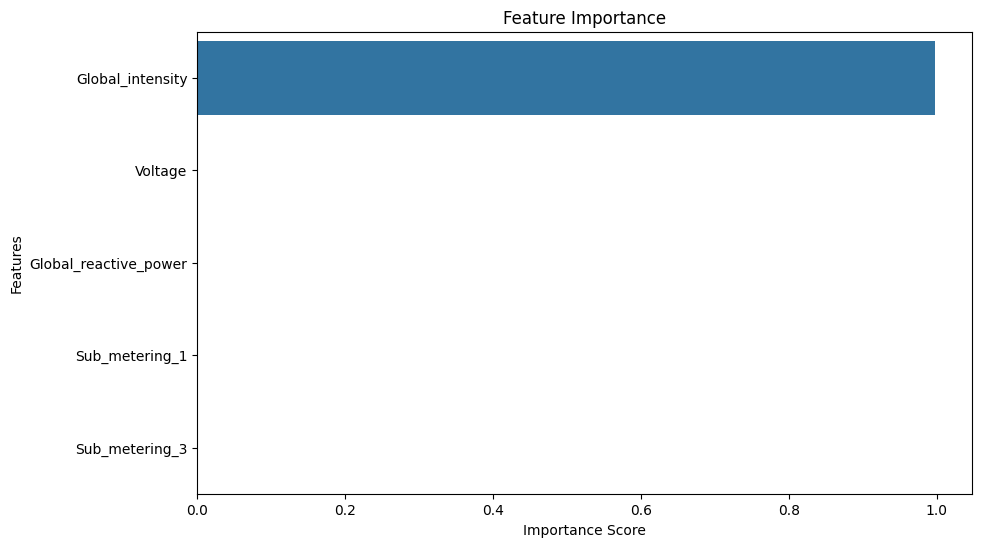

In [17]:
# feature importance

importances = model.feature_importances_
feature_names = x.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

In [25]:
# Yearly Average Energy Consumption

import plotly.express as px
import plotly.graph_objects as go

# Group data by year and calculate the mean of sub-meters for each year
yearly_consumption = df[df['datetime'].dt.year != 2006].groupby(df['datetime'].dt.year)[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

# Convert index to a column for Plotly
yearly_consumption = yearly_consumption.reset_index()
yearly_consumption.rename(columns={'datetime': 'Year'}, inplace=True)

# Create an interactive bar plot
fig = go.Figure()

# Add bars for each sub-metering
for sub_meter in ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']:
    fig.add_trace(go.Bar(
        x=yearly_consumption['Year'],
        y=yearly_consumption[sub_meter],
        name=sub_meter
    ))

# Update layout
fig.update_layout(
    title="Yearly Average Energy Consumption per Sub-meter",
    xaxis_title="Year",
    yaxis_title="Average Energy Consumption",
    barmode='group',  # Grouped bar chart
    xaxis=dict(tickmode='array', tickvals=yearly_consumption['Year']),
    template="plotly_dark"  # Optional: Dark theme
)

# Show plot
fig.show()

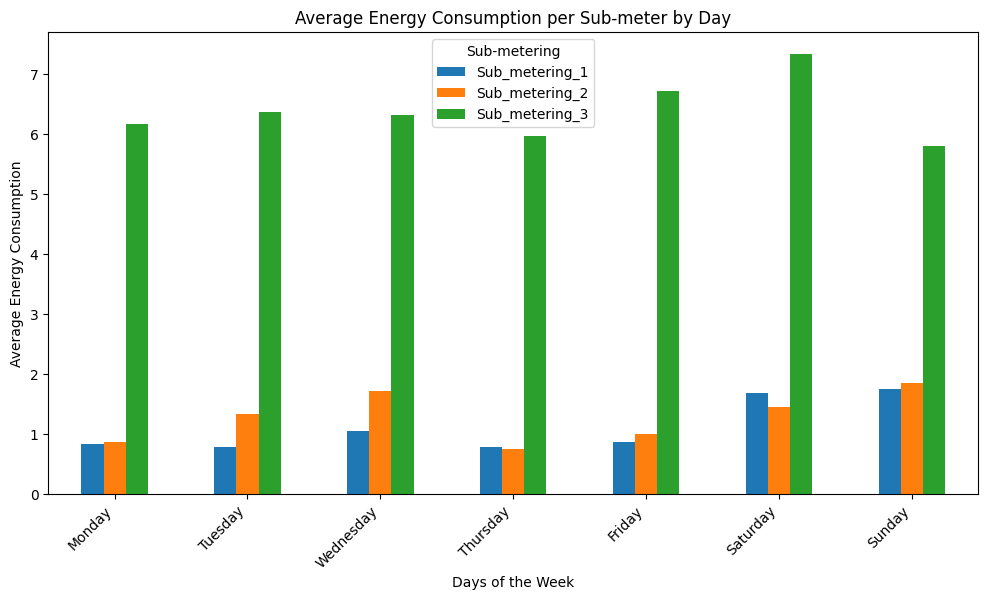

In [31]:
# Energy Consumption per Sub-meter

day_mapping = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

# Convert numerical 'Weekday' column to day names
df['Day_Name'] = df['day_of_week'].map(day_mapping)

# Calculate average energy consumption per day
day_consumption = df.groupby('Day_Name')[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

# Sort the days correctly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_consumption = day_consumption.reindex(day_order)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
day_consumption.plot(kind='bar', ax=ax)
ax.set_xlabel('Days of the Week')
ax.set_ylabel('Average Energy Consumption')
ax.set_title('Average Energy Consumption per Sub-meter by Day')
ax.set_xticklabels(day_order, rotation=45, ha='right')
ax.legend(title='Sub-metering')


In [18]:
# Energy Consumption - 24 hours rolling averages

import plotly.express as px

df['Date'] = df['datetime'].dt.date
df['Time'] = df['datetime'].dt.time
fig = px.line(df.groupby('Time')['Global_active_power'].mean().reset_index(), x='Time', y='Global_active_power', title='Average Energy Consumption by Time')
fig